### Assignment: Бэггинг и случайный лес

In [0]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [0]:
dataset = datasets.load_digits()
X = dataset['data']
y = dataset['target']

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.8269118559900683

In [12]:
clf = BaggingClassifier(n_estimators = 100)
scores = cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.9226070763500932

In [13]:
d = X.shape[1]
number_of_features = int(d ** 0.5)
number_of_features

8

In [14]:
clf = BaggingClassifier(n_estimators = 100, max_features = number_of_features)
scores = cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.930996275605214

In [15]:
clf = BaggingClassifier(DecisionTreeClassifier(max_features = number_of_features), n_estimators = 100)
scores = cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.9510211049037863

In [16]:
clf = RandomForestClassifier(n_estimators = 100, max_features = number_of_features)
scores = cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.9532526381129733

### Зависимость от количества деревьев

In [0]:
number_of_estimators = np.arange(5, 150, 5)
scores_estimators = []
for n in number_of_estimators:
    n
    clf = RandomForestClassifier(n_estimators = n, max_features = number_of_features)
    scores_estimators.append(cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

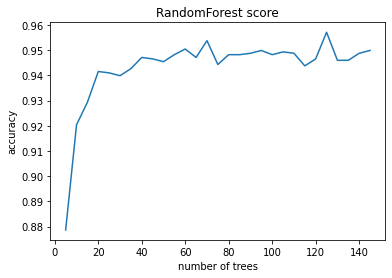

In [20]:
plt.plot(number_of_estimators, scores_estimators)
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')

##Зависимость от количества признаков

In [0]:
number_of_features_list = np.arange(5, d, 5)
scores_features = []
for n in number_of_features_list:
    n
    clf = RandomForestClassifier(n_estimators = 100, max_features = n)
    scores_features.append(cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

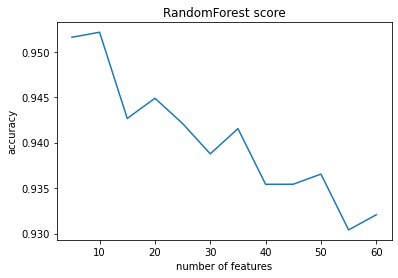

In [22]:
plt.plot(number_of_features_list, scores_features)
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title('RandomForest score')

##Зависимость от глубины деревьев

In [0]:
depths = np.arange(1, 30, 1)
scores_depth = []
for n in depths:
    n
    clf = RandomForestClassifier(n_estimators = 100, max_features = number_of_features, max_depth = n)
    scores_depth.append(cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

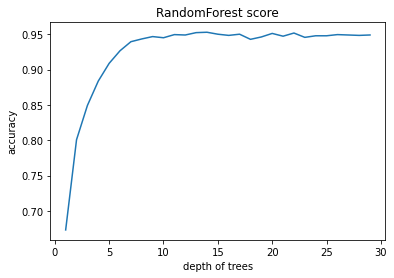

In [24]:
plt.plot(depths, scores_depth)
plt.xlabel('depth of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')